### **Regresion Lineal y Logistica**

En el contexto de la IA y el aprendizaje automático, tanto la regresión lineal como la logística son técnicas esenciales.
Se utilizan para entrenar modelos predictivos a partir de datos históricos, que luego pueden hacer predicciones o clasificaciones en nuevos datos.

### **Regresion Lineal**

Se utiliza para modelar la relacion entre dos o más variables (1 dependiente y 1 o más independientes)
Los ejemplos máa comunes de uso son las predicciones o tendencias

En el caso de prediccion de precio de casas, podemos considerar diferentes variables independientes:
- Número de cuartos
- Metros cuadrados
- Número de pisos

La variable dependiente, podría ser el precio, el cual va a depender de otros factores, como el valor actual del mercado, ubicación, etc.

La regresión lineal, nos sirve en este caso para predecir el precio de la casa. Basándose en estas variables, va a analizar cierta cantidad de datos (mientras más mejor) para de esta manera encontrar una relación y poder predecir el precio de la casa de una manera certera.

En el siguiente ejercicio podemos ver como funcionan las variables dependientes e independientes, la división entre datos de entrenamiiento y prueba y también ver el resultado del modelo y la exactitud de las predcciones.


In [1]:
!pip3 install numpy pandas matplotlib scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

print("Todas las bibliotecas se importaron correctamente.")

Todas las bibliotecas se importaron correctamente.


In [5]:
# Generar datos sintéticos
np.random.seed(0)
n = 100

# Especificamos que el tamaño va de 500 a 3500 m2 y necesitamos generar n registros, en donde n = 100
tamaño = np.random.randint(500, 3500, n)

# Especificamos que el número de habitaciones es entre 1 y 5 y necesitamos generar n registros, en donde n = 100
habitaciones = np.random.randint(1, 5, n)

# 50,000 precio base, a esto hay que sumarle el extra por habitaciones y m2
# Multiplicamos tamaño por 50, significa que cada m2 aumenta el valor e la casa por 50 unidades (pesos)
# Multiplicamos numero de habitaciones por 10,000, significa que cada habitaicion extra, aumenta el valor de la casa por 10,000 unidades
# Generamos un array de n (100) numeros, simulando el valor de la casa dependiendo el mercado
precio = 50000 + (tamaño * 50) + (habitaciones * 10000) + (np.random.randn(n) * 10000)

# Crear columnas (headers) con sus valores
data = pd.DataFrame({
    'Tamaño (pies cuadrados)': tamaño,
    'Habitaciones': habitaciones,
    'Precio': precio
})

# Redondear todos los valores a 0 decimales
data = data.round(0)

# Guardar a CSV
data.to_csv('precios_casas.csv', index=False)


In [6]:
# Cargar datos
data = pd.read_csv('precios_casas.csv')

# Mostrar las primeras filas
print(data.head())

# Estadísticas descriptivas
# count: valores no nulos
# mean: promedio (suma de los valores de cada columna entre numero de filas)
# std: desviación estandar
# min: valor minimo por columna
# 25%: el 25% de las casa están por debajo de esos valores
# 50%: el 50% de las casa están por debajo de esos valores
# 75%: el 75% de las casa están por debajo de esos valores
# max: valor máximo por columna
print(data.describe())

   Tamaño (pies cuadrados)  Habitaciones    Precio
0                     3232             1  230976.0
1                     3107             4  242804.0
2                     2153             2  187386.0
3                     1335             3  148823.0
4                     1263             1  134146.0
       Tamaño (pies cuadrados)  Habitaciones         Precio
count               100.000000    100.000000     100.000000
mean               2171.320000      2.560000  184247.190000
std                 890.389427      1.131014   46470.286164
min                 584.000000      1.000000   91427.000000
25%                1291.250000      1.000000  146897.250000
50%                2349.500000      3.000000  187568.000000
75%                2958.500000      3.250000  223723.250000
max                3458.000000      4.000000  266074.000000


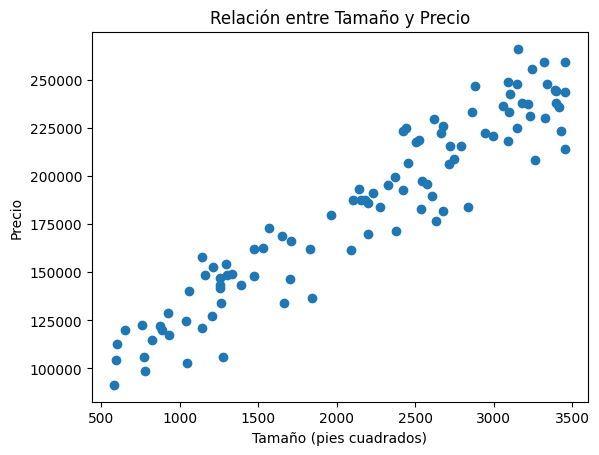

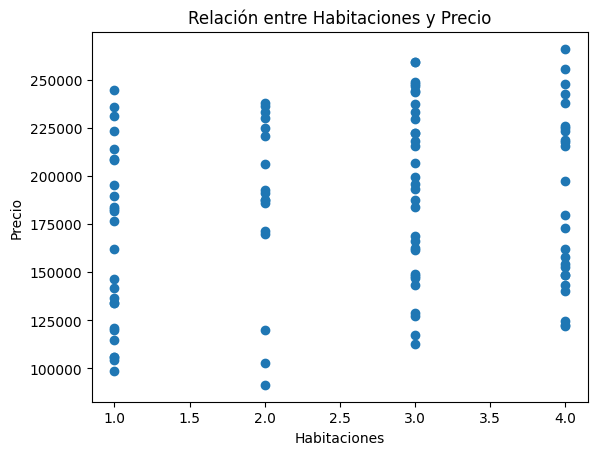

In [7]:
# Relación entre tamaño y precio
plt.scatter(data['Tamaño (pies cuadrados)'], data['Precio'])
plt.xlabel('Tamaño (pies cuadrados)')
plt.ylabel('Precio')
plt.title('Relación entre Tamaño y Precio')
plt.show()

# Relación entre habitaciones y precio
plt.scatter(data['Habitaciones'], data['Precio'])
plt.xlabel('Habitaciones')
plt.ylabel('Precio')
plt.title('Relación entre Habitaciones y Precio')
plt.show()

# Las siguientes gráficas muestran la relación del precio de las casas y el tamaño y número de habitaciones respectivamente

In [8]:
# train_test_split: se utiliza para dividir un conjunto de datos en dos subconjuntos, uno para entrenamiento y otro para prueba

# variables independientes
X = data[['Tamaño (pies cuadrados)', 'Habitaciones']]
# variables dependientes o target, lo que se desea predecir
y = data['Precio']

# Dividir en conjuntos de entrenamiento y prueba
# X variables que se usarán para la predicción
# y variable que queremos predecir
# test_size=0.2: indica que usaremos el 20% de los datos para el conjunto de prueb  a y el 80% para el conjunto de entrenamiento
# Conjunto de entrenamiento se usa para entrenar el modelo, se usa para enseñar al modelo la relacion entre los patrones en los datos (mientras más, mejor)
# Conjunto de prueba se usa para comparar las predicciones con los datos reales y ver que tan acertadas son.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [9]:
# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Coeficientes del modelo
# Intercepto: Representa el valor de la casa cuando las variables independientes son 0
# Coeficientes: Indican cuánto aumenta el precio en PROMEDIO dependiendo de las variables independientes (no. de cuartos y tamaño)
#   si los coeficientes son positivos, significa que el precio aumentara, si son negativos, el precio baja
print("Intercepto:", modelo.intercept_)
print("Coeficientes:", modelo.coef_)


Intercepto: 50103.52837440983
Coeficientes: [  50.17961155 9994.2622817 ]


In [10]:
# Predecir en el conjunto de prueba
# Aquí utilizamos el modelo que entrenamos en el paso anterior para hacer las predicciones basado en los conjuntos de prueba creados anteriormente (X_test)
# El método predict genera las predicciones del modelo para estas entradas, y el resultado se guarda en y_pred.
y_pred = modelo.predict(X_test)

# Evaluar el modelo
# El MSE mide la media de los cuadrados de los errores, es decir, la diferencia promedio al cuadrado entre los valores reales y los predichos. 
# Una MSE más baja indica que el modelo está haciendo predicciones más cercanas a los valores reales.
mse = mean_squared_error(y_test, y_pred)

# El r2, nos dice qué proporción de la variabilidad en la variable que estás tratando de predecir (el precio de la casa) es explicada
# por las variables que estás usando para hacer la predicción (número de cuartos y tamaño).

# Un r2 de 1 indica que el modelo predice perfectamente los valores observados, mientras más cercano a uno, es más acertado
# Un r2 de 0 significa que el modelo no explica nada de la variabilidad en la variable dependiente.
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)


Error Cuadrático Medio (MSE): 137936233.15210718
Coeficiente de Determinación (R^2): 0.9377195321238362


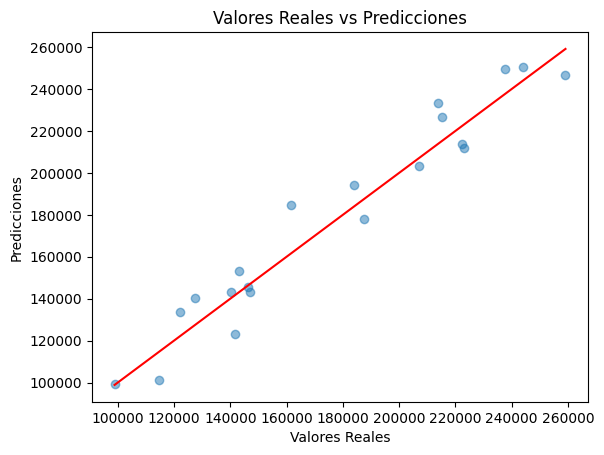

In [11]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')


# overfitting: Ocurre cuando un modelo es demasiado complejo y se ajusta demasiado bien a los datos de entrenamiento. 
#              El overfitting podría ocurrir si agregamos demasiadas variables (parámetros) o características al modelo.
#              Los síntomas del overfitting incluyen:
#                - Bajo error en los datos de entrenamiento.
#                - Alto error en los datos de prueba.

# underfitting: Ocurre cuando un modelo es demasiado simple para capturar la estructura subyacente en los datos. 
#               En otras palabras, el modelo no se ajusta bien ni a los datos de entrenamiento ni a los de prueba. 
#               Esto puede deberse a que el modelo tiene muy pocos parámetros o a que no ha capturado la complejidad necesaria del problema.
#               Los síntomas del underfitting incluyen:
#               - Alto error en los datos de entrenamiento.
#               - Alto error en los datos de prueba.

# Agregar línea de referencia perfecta (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')

# Mostrar el gráfico
plt.show()
